In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from keras.optimizers import Adam 
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import keras_tuner as kt
from tensorflow.keras import layers

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn
import pandas

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
%matplotlib inline

Using TensorFlow backend.


In [2]:
filepath = "datasets/wine_with_types.csv"
df = pd.read_csv(filepath)
df = df.sample(frac=1, random_state = 42, ignore_index=True)

In [3]:
X = df.drop("quality", axis=1)
y = df["quality"]
y = np.asarray(y).astype('int32').reshape((-1,1))
y.shape
X.shape

(6497, 12)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 10, shuffle=True)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1664      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 84,225
Trainable params: 84,225
Non-trainable params: 0
_________________________________________________________________


In [7]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7)

In [8]:
history = NN_model.fit(X_train, y_train, epochs=250, batch_size=5, validation_split = 0.2, callbacks=stop_early)

Epoch 1/250
728/728 [==============================] - 1s 2ms/step - loss: 0.8475 - mean_absolute_error: 0.8475 - val_loss: 0.5825 - val_mean_absolute_error: 0.5825
Epoch 2/250
728/728 [==============================] - 1s 2ms/step - loss: 0.6466 - mean_absolute_error: 0.6466 - val_loss: 0.5961 - val_mean_absolute_error: 0.5961
Epoch 3/250
728/728 [==============================] - 1s 2ms/step - loss: 0.6172 - mean_absolute_error: 0.6172 - val_loss: 0.5697 - val_mean_absolute_error: 0.5697
Epoch 4/250
728/728 [==============================] - 1s 2ms/step - loss: 0.6167 - mean_absolute_error: 0.6167 - val_loss: 0.6135 - val_mean_absolute_error: 0.6135
Epoch 5/250
728/728 [==============================] - 1s 1ms/step - loss: 0.6183 - mean_absolute_error: 0.6183 - val_loss: 0.6665 - val_mean_absolute_error: 0.6665
Epoch 6/250
728/728 [==============================] - 1s 2ms/step - loss: 0.6223 - mean_absolute_error: 0.6223 - val_loss: 0.6080 - val_mean_absolute_error: 0.6080
Epoch 7/25

728/728 [==============================] - 2s 3ms/step - loss: 0.4965 - mean_absolute_error: 0.4965 - val_loss: 0.5058 - val_mean_absolute_error: 0.5058
Epoch 51/250
728/728 [==============================] - 2s 2ms/step - loss: 0.4960 - mean_absolute_error: 0.4960 - val_loss: 0.5081 - val_mean_absolute_error: 0.5081
Epoch 52/250
728/728 [==============================] - 1s 2ms/step - loss: 0.4910 - mean_absolute_error: 0.4910 - val_loss: 0.5245 - val_mean_absolute_error: 0.5245
Epoch 53/250
728/728 [==============================] - 2s 2ms/step - loss: 0.4939 - mean_absolute_error: 0.4939 - val_loss: 0.5045 - val_mean_absolute_error: 0.5045
Epoch 54/250
728/728 [==============================] - 2s 2ms/step - loss: 0.4884 - mean_absolute_error: 0.4884 - val_loss: 0.5311 - val_mean_absolute_error: 0.5311


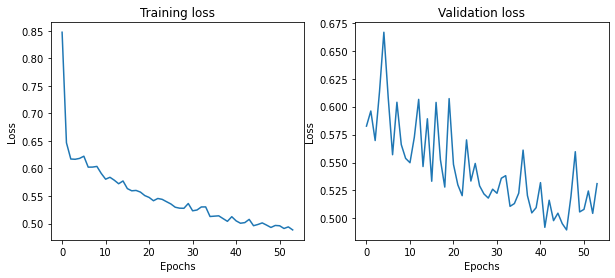

In [9]:
loss = history.history['loss']
# accuracy = history.history['accuracy']

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axs[0].plot(range(len(loss)), loss)
plt.plot(history.history['val_loss'])
axs[0].set(xlabel="Epochs", ylabel="Loss", title="Training loss")
axs[1].set(xlabel="Epochs", ylabel="Loss", title="Validation loss")

# axs[1].plot(range(len(accuracy)), accuracy)
# axs[1].set(xlabel="Epochs", ylabel="Accuracy", title="Training accuracy")
# plt.plot(history.history['val_accuracy'])

plt.show()

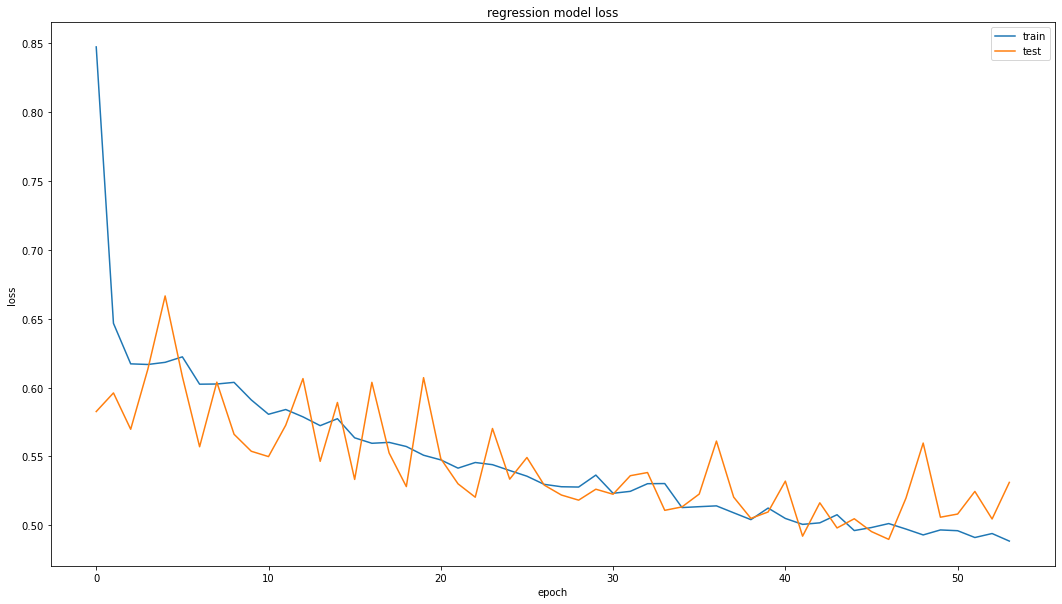

In [10]:
plt.figure(figsize=(18, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('regression model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [11]:
# make class predictions for the testing set
y_pred_reg = NN_model.predict(X_test)
y_pred_reg_rounded = np.around(y_pred_reg)
y_pred_reg_rounded

array([[5.],
       [6.],
       [8.],
       ...,
       [7.],
       [5.],
       [7.]], dtype=float32)

In [12]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_reg_rounded))

0.5538461538461539


In [13]:
from sklearn.metrics import mean_squared_error
print(metrics.mean_squared_error(y_test, y_pred_reg_rounded))

0.5887179487179487


In [14]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
cm = metrics.confusion_matrix(y_test, y_pred_reg_rounded)
print(cm)

[[  0   1   5   3   0   0   0]
 [  0   4  43  15   3   0   0]
 [  0   5 433 193  11   0   0]
 [  0   0 202 489 153   7   0]
 [  0   0  14 145 148  17   0]
 [  0   0   1  21  30   6   0]
 [  0   0   0   0   1   0   0]]


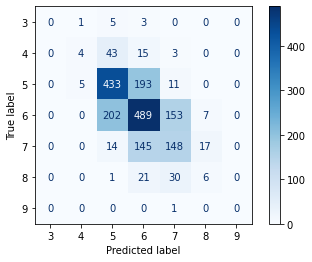

In [15]:
labels = ['3',"4","5","6","7","8","9"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()